In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

BASE_PATH = r"f:\BRACU\Semester 12 Final\CSE425\FInal_project"
DATA_PATH = os.path.join(BASE_PATH, "processed_data2")

print(f"Data Path: {DATA_PATH}")

Data Path: f:\BRACU\Semester 12 Final\CSE425\FInal_project\processed_data2


In [9]:
mel_specs = np.load(os.path.join(DATA_PATH, 'mel_spectrograms_normalized.npy'))
features = np.load(os.path.join(DATA_PATH, 'features_normalized.npy'))
lyrics_emb = np.load(os.path.join(DATA_PATH, 'lyrics_embeddings.npy'))
labels = np.load(os.path.join(DATA_PATH, 'labels.npy'), allow_pickle=True)

metadata = pd.read_csv(os.path.join(DATA_PATH, 'metadata.csv'))

print("Data Loaded Successfully!")
print(f"Mel Spectrograms Shape: {mel_specs.shape}")
print(f"Handcrafted Features Shape: {features.shape}")
print(f"Lyrics Embeddings Shape: {lyrics_emb.shape}")
print(f"Metadata Shape: {metadata.shape}")


Data Loaded Successfully!
Mel Spectrograms Shape: (1336, 128, 1024)
Handcrafted Features Shape: (1336, 290)
Lyrics Embeddings Shape: (1336, 768)
Metadata Shape: (1336, 5)


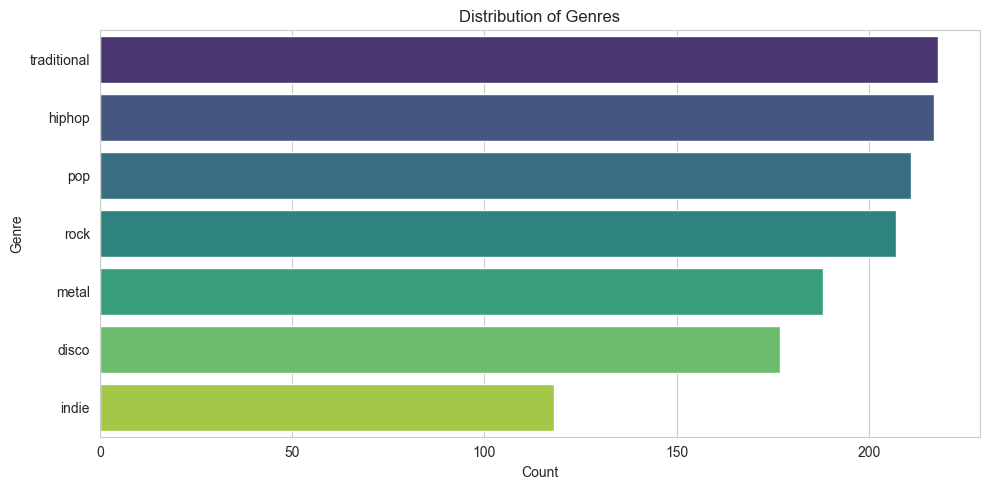

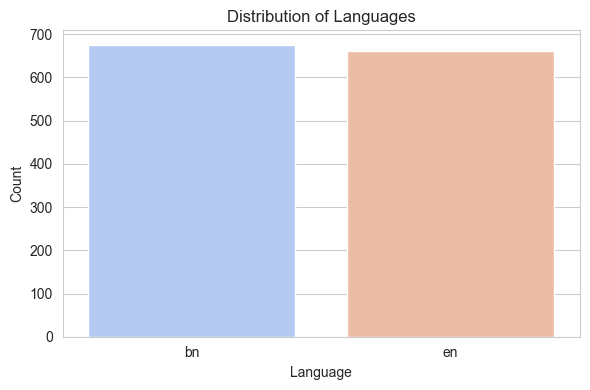

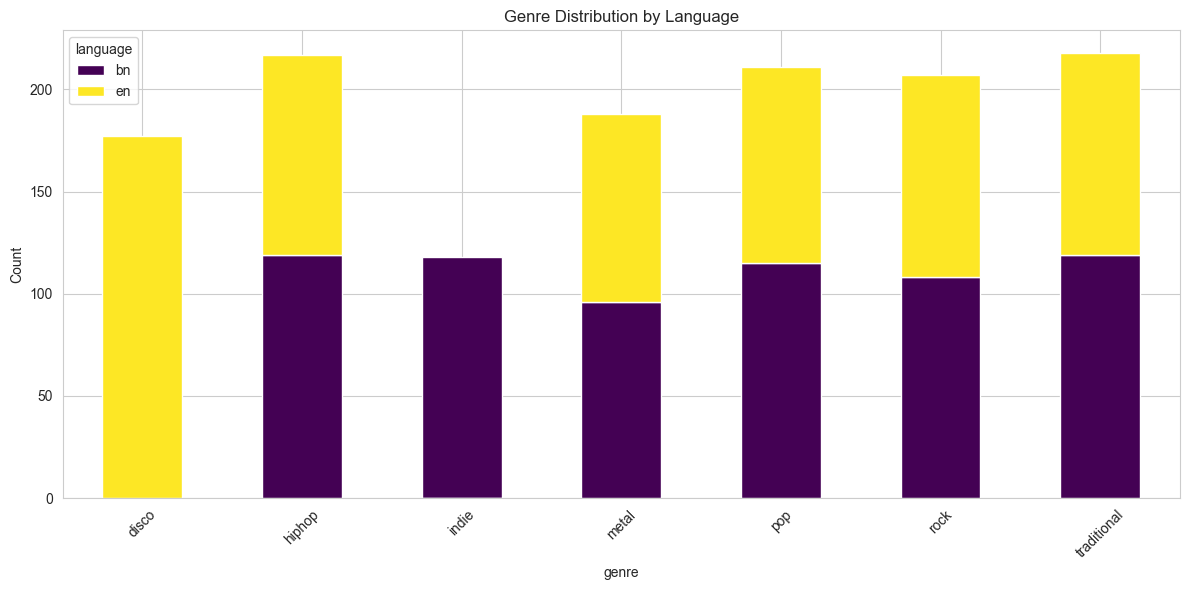

In [10]:
# 1. Class Distribution (Genre)
plt.figure(figsize=(10, 5))
sns.countplot(y=metadata['genre'], order=metadata['genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# 2. Language Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=metadata['language'], palette='coolwarm')
plt.title('Distribution of Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Genre vs Language Crosstab
ct = pd.crosstab(metadata['genre'], metadata['language'])
ct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Genre Distribution by Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

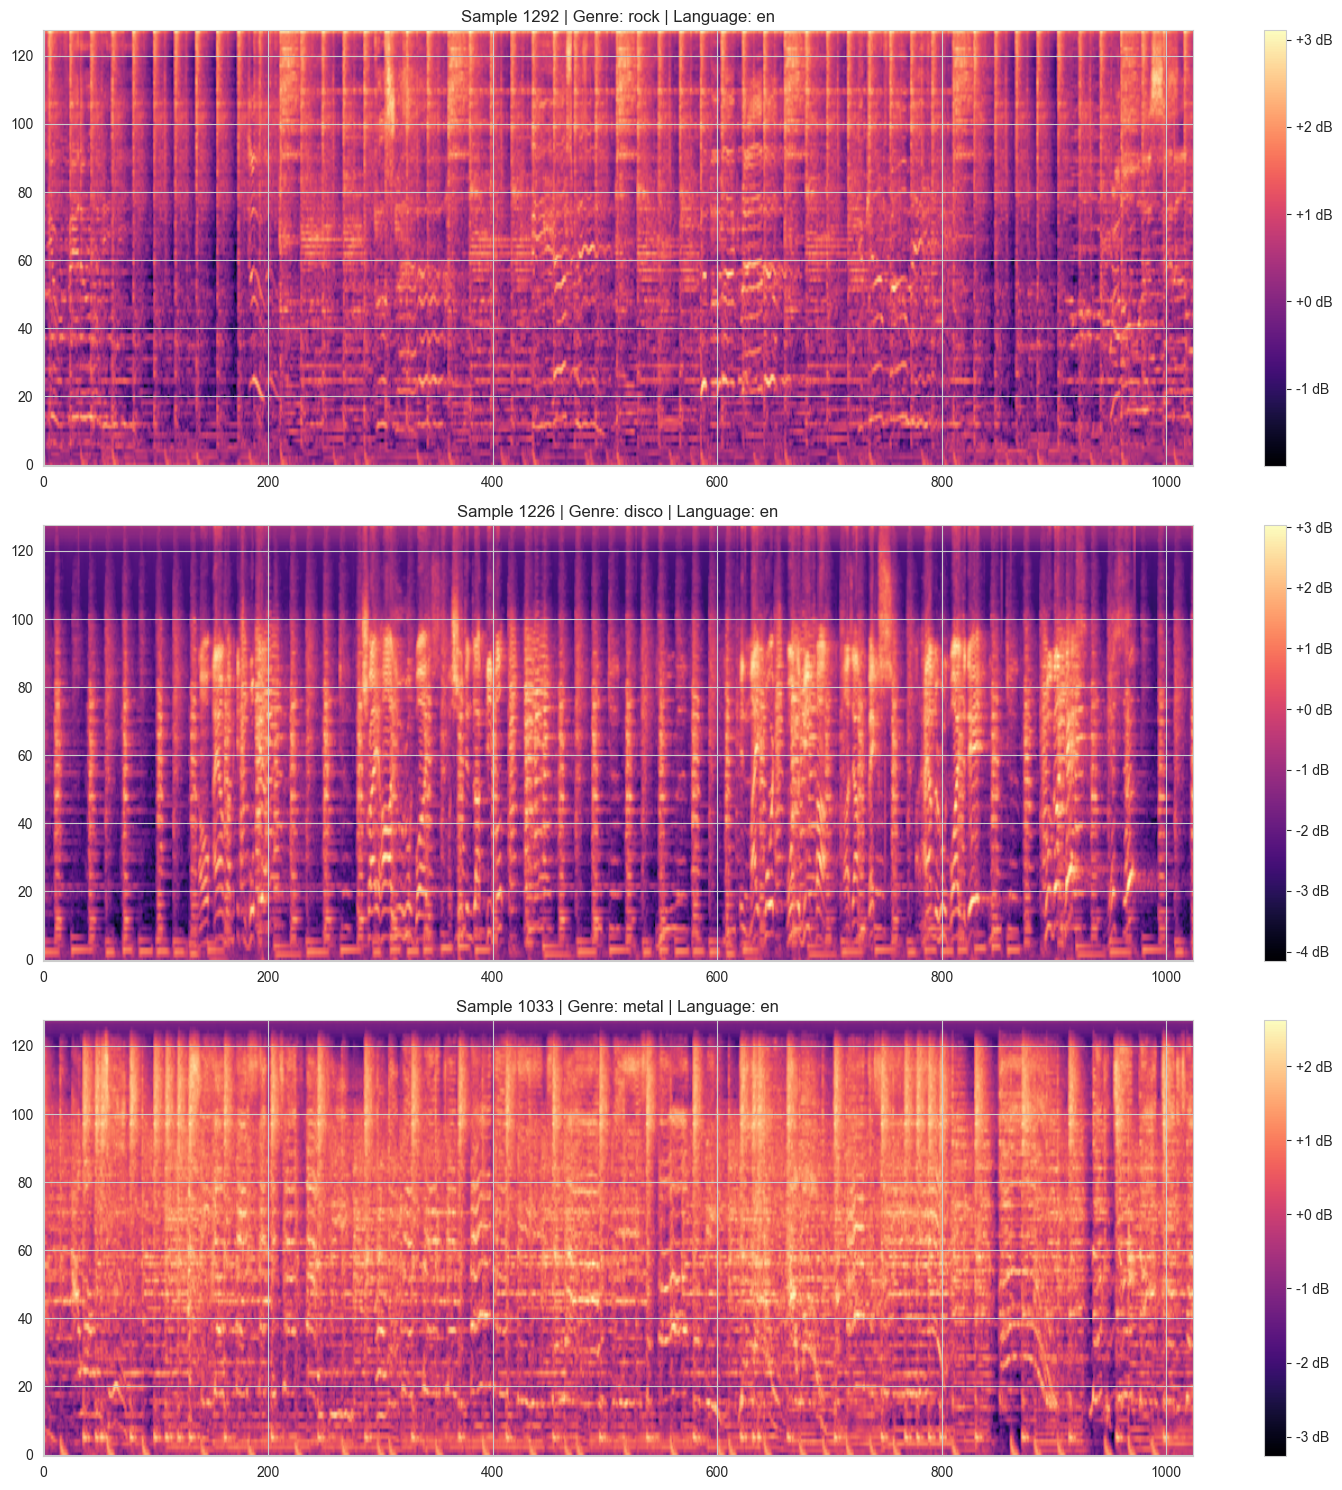

In [11]:
num_samples = 3
indices = np.random.choice(len(mel_specs), num_samples, replace=False)

plt.figure(figsize=(15, 5 * num_samples))
for i, idx in enumerate(indices):
    plt.subplot(num_samples, 1, i + 1)
    spec = mel_specs[idx]
    
    label = metadata.iloc[idx]['genre']
    lang = metadata.iloc[idx]['language']
    
    plt.imshow(spec, aspect='auto', origin='lower', cmap='magma')
    plt.title(f"Sample {idx} | Genre: {label} | Language: {lang}")
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()

plt.show()

Running t-SNE on Audio Features...
Running t-SNE on Lyrics Embeddings...


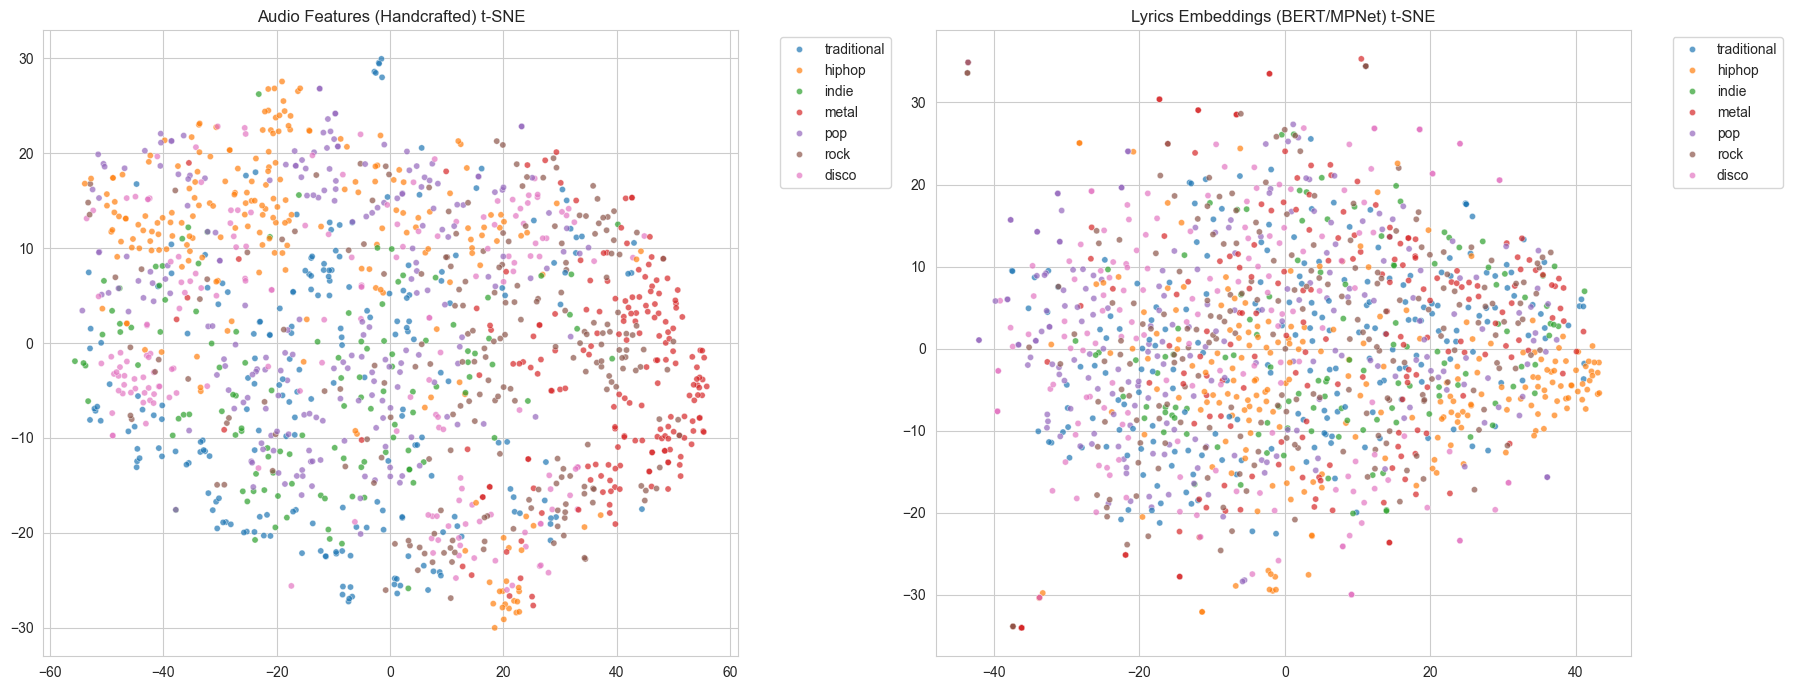

In [12]:
# 1. TSNE on Handcrafted Audio Features
print("Running t-SNE on Audio Features...")
tsne_audio = TSNE(n_components=2, random_state=42, perplexity=30)
audio_emb_2d = tsne_audio.fit_transform(features)

# 2. TSNE on Lyrics Embeddings
print("Running t-SNE on Lyrics Embeddings...")
tsne_lyrics = TSNE(n_components=2, random_state=42, perplexity=30)
lyrics_emb_2d = tsne_lyrics.fit_transform(lyrics_emb)

# Plot Comparisons
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Audio Plot
sns.scatterplot(x=audio_emb_2d[:,0], y=audio_emb_2d[:,1], hue=metadata['genre'], palette='tab10', s=20, alpha=0.7, ax=axes[0])
axes[0].set_title('Audio Features (Handcrafted) t-SNE')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Lyrics Plot
sns.scatterplot(x=lyrics_emb_2d[:,0], y=lyrics_emb_2d[:,1], hue=metadata['genre'], palette='tab10', s=20, alpha=0.7, ax=axes[1])
axes[1].set_title('Lyrics Embeddings (BERT/MPNet) t-SNE')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

(np.float64(0.0), np.float64(290.0), np.float64(290.0), np.float64(0.0))

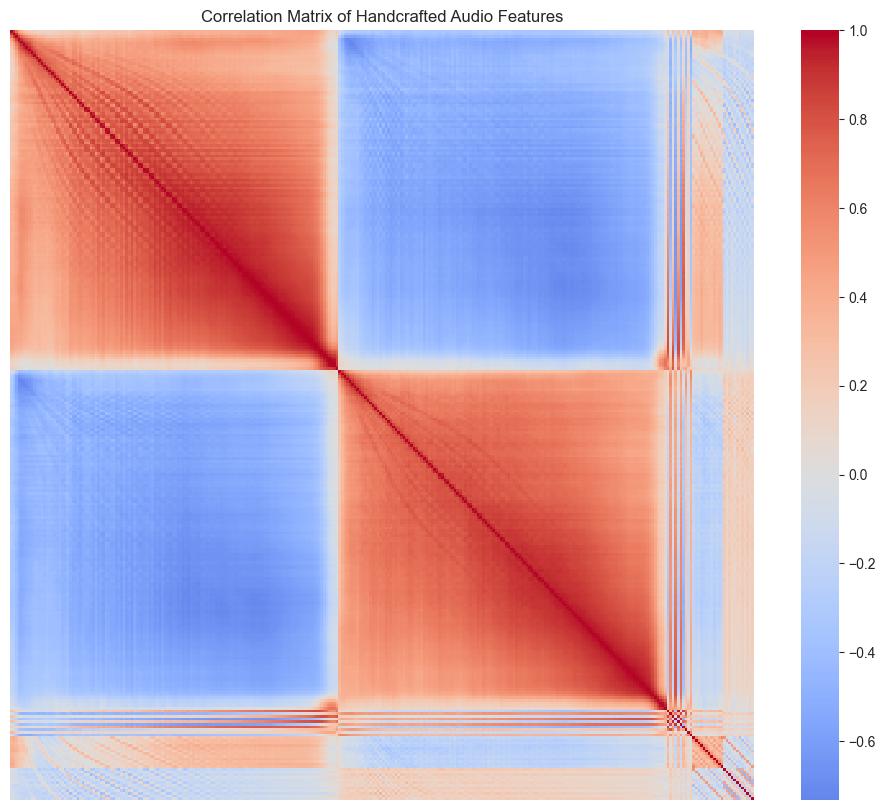

In [13]:
corr_matrix = np.corrcoef(features.T)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Handcrafted Audio Features')
plt.axis('off') 

In [14]:
df_features = pd.DataFrame(features)
print("Handcrafted Features Statistics:")
print(df_features.describe().iloc[:, :10])

Handcrafted Features Statistics:
                  0             1             2             3             4  \
count  1.336000e+03  1.336000e+03  1.336000e+03  1.336000e+03  1.336000e+03   
mean  -7.445807e-17 -1.489161e-16  1.701899e-16  2.127373e-17 -2.021005e-16   
std    1.000374e+00  1.000374e+00  1.000374e+00  1.000374e+00  1.000374e+00   
min   -4.368205e+00 -4.584459e+00 -5.557503e+00 -5.685398e+00 -5.375014e+00   
25%   -4.940442e-01 -3.757288e-01 -4.449984e-01 -5.459385e-01 -6.160891e-01   
50%    1.338613e-01  2.080309e-01  2.131893e-01  1.553109e-01  9.730133e-02   
75%    6.438828e-01  6.674297e-01  6.532357e-01  7.234155e-01  7.425957e-01   
max    2.663861e+00  2.049977e+00  1.771902e+00  1.855936e+00  2.247453e+00   

                  5             6             7             8             9  
count  1.336000e+03  1.336000e+03  1.336000e+03  1.336000e+03  1.336000e+03  
mean  -8.509494e-17  1.489161e-16 -6.382120e-17 -3.084692e-16 -1.595530e-16  
std    1.000374e+00  